# Import the necessary libraries for Data Analysis and visualization

In [10]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Restaurant dataset into a DataFrame

In [11]:
df=pd.read_csv('dataset.csv',encoding='ISO-8859-1')
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# LEVEL 1-Task 3:Geospatial Analysis

# LEVEL 1-Task 3(i):Visualize the locations of restaurants on amap using latitude and longitude
information.

In [12]:
map_center=[df['Latitude'].mean(),df['Longitude'].mean()]
restaurant_map=folium.Map(location=map_center,zoom_start=1)
for index,row in df.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']],popup=row['Restaurant Name']).add_to(restaurant_map)
restaurant_map.save('Restaurant_map.html')

# LEVEL 1-Task 3(ii):Analyze the distribution of restaurants across different cities or countries.

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


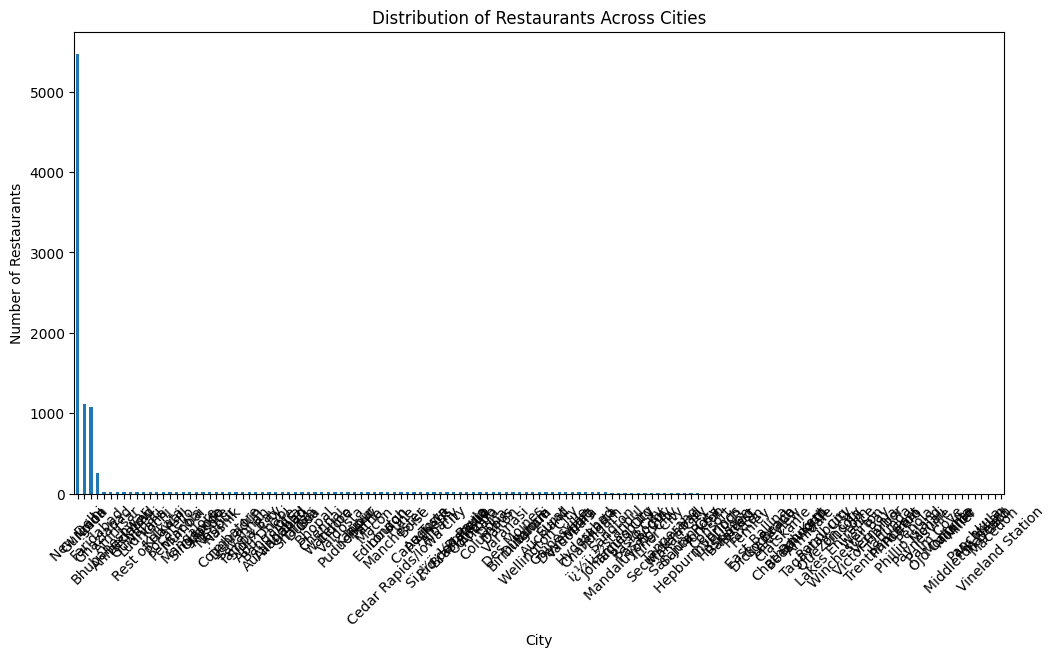

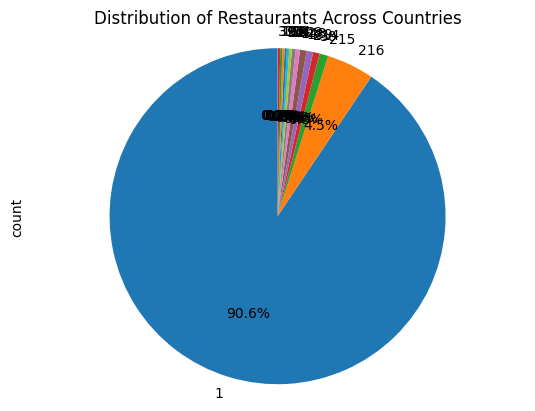


Descriptive Statistics for Cities:
count     141.000000
mean       67.737589
std       476.723245
min         1.000000
25%         1.000000
50%        20.000000
75%        20.000000
max      5473.000000
Name: count, dtype: float64

Descriptive Statistics for Countries:
count      15.000000
mean      636.733333
std      2219.824525
min         4.000000
25%        20.500000
50%        34.000000
75%        60.000000
max      8652.000000
Name: count, dtype: float64


In [3]:
citys=df['City'].value_counts()
countrys=df['Country Code'].value_counts()
print(citys,countrys)

plt.figure(figsize=(12, 6))
citys.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()
countrys.plot(kind='pie',autopct='%1.1f%%',startangle=90)

plt.title('Distribution of Restaurants Across Countries')
plt.axis('equal')
plt.show()
print("\nDescriptive Statistics for Cities:")
print(citys.describe())
print("\nDescriptive Statistics for Countries:")
print(countrys.describe())

# LEVEL 1-Task 3(iii):Determine if there is any correlation between the restaurant's location and its rating.

Correlation between Latitude and Rating: 0.0005155806902363053
Correlation between Longitude and Rating: -0.11681757734540295


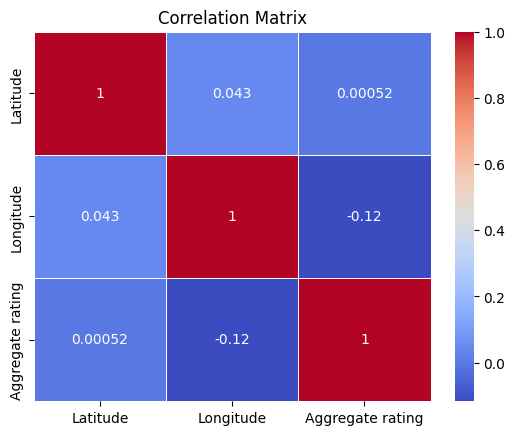

In [6]:
correlation_matrix=df[['Latitude','Longitude','Aggregate rating']].corr()
location_rating_corr=correlation_matrix.loc['Latitude':'Longitude','Aggregate rating']
print("Correlation between Latitude and Rating:",location_rating_corr['Latitude'])
print("Correlation between Longitude and Rating:",location_rating_corr['Longitude'])
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
